# CAO Points Analysis
## Author: Ross Downey

http://www2.cao.ie/points/l8.php
***


In [1]:
# HTTP Requests Python Module
import requests as rq

# Regular expressions module
import re

# Dates and time module
import datetime as dt

# Pandas
import pandas as pd

# Downloading
import urllib.request as urlrq

# Plotting
import matplotlib.pyplot as plt

<br>

## 2021 Points

***

In [2]:
# Retrieving the 2021 CAO from this URL using the requests module
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Veryifing Python has downloaded the data from the URL, [200] means it's ok
resp

<Response [200]>

<br>  

## Ensuring original dataset is saved
***

In [3]:
# Saving current date and time as a function
now = dt.datetime.now()

# Convert date and time to a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Filepath to be created in data folder to save original data
filepath = 'data/cao2021_' + nowstr + '.html'

<br>

## Error on Server
***
Issue with the character set defined on the CAO server.  
The server says we should decode as per:  
    Content-Type: text/html; charset=iso-8859-1  
On decoding as per 'iso-8859-1' it was noted that one line is using \x96,  
which is not defined in iso-8859-1.  
The similar decoding standard 'cp1252' will be used, which has a codepoint for \x96.

In [5]:
# Amending the original encoding
original_encoding = resp.encoding

# Changing to 'cp1252'
resp.encoding = 'cp1252'

In [6]:
# Saving the original file downloaded from server
with open(filepath, 'w') as f:
    f.write(resp.text)

In [7]:
# Compiling the regular expression for the matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
# This gives us only the lines in the original HTML code that have CAO points

<br>

## Explanation of Regular Expression
***
re.compile  
r = converting html flags to raw strings  
[A-Z]{2} = Everything with 2 letters  
[0-9]{3} = Followed by 3 numbers, this is each course code e.g. AL801
(.*) is space then wildcard, this is the course title and points string.  
Need to now load all of the lines with course details and remove unnecessary spaces and characters, leaving the code, title, and points for each course.

In [8]:
# Creating filepath to save the new csv file
filepath = 'data/cao2021_csv_' + nowstr + '.csv'


# Adding a counter to total the number of courses processed
no_lines = 0

# Opening filepath to save new csv file
with open(filepath, 'w') as f:
    # Need a header row, defining column titles
    f.write(','.join (['Course Code', 'Course', 'R1 Points_2021', 
                      'R2 Points_2021']) + '\n')
# Looping through the lines of the data 
    for line in resp.iter_lines():
        
        # Decode the line but using the 'wrong' encoding
        dline = line.decode('cp1252')
    
        # Using regular expression to match lines with courses and points only
        if re_course.fullmatch(dline):
        
            # Adding 1 for each line matched to give an overall total using the counter
            no_lines = no_lines + 1
            
            # Define the course code, first five characters using index
            course_code = dline[:5]
            
            # Define the course title, using index also, stripping blank spaces
            course_title = dline [7:57].strip()
            
            # Define the round one points column, incorporating spaces
            course_points = re.split(' +', dline[60:])
            
            # If the course has a round 2 points value, needs to be included
            if len(course_points) != 2:
                course_points = course_points[:2]
        
            # Defining the above strings as one array
            linesplit = [course_code, course_title, 
                         course_points[0], course_points[1]]
            
            '''# Replacing special characters ('#', '*') from points columns
            # Taken from https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string
            course_points[0] = re.sub(r'[#|*|]',r'',course_points[0])
            course_points[1] = re.sub(r'[#|*|]',r'',course_points[1])
            Note: Did not work, manually edited csv file instead'''
        
            # Concatenate the substrings after splitting but with commas in between
            # Rejoined and using '\n' to add a new line for each course
            f.write(','.join(linesplit) + '\n')
        
# Displaying the total number of lines processed
print(f"Total number of lines is {no_lines}. ")

Total number of lines is 949. 


<br>

### Cleaning up csv file
***
1. Removed any special characters ( '#', '*' etc.) from the data to peform analysis on the data. This was done using "Find and Replace" in Notepad ++  
2. Saved csv file as "Ver2" to read into pandas


In [9]:
# Ensure Version 2 is read into pandas, removing special characters
df2021 = pd.read_csv('data/cao2021_csv_20211108_121221_ver2.csv',
                     encoding='cp1252', sep=',')

In [10]:
df2021

,Course Code,Course,R1 Points_2021,R2 Points_2021
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [11]:
# Spot Checking Index 181, confirming encoding and points
df2021.iloc[181]

Course Code                                                   CM003
Course            Oideachas – Bunmhúinteoireacht Trí Mheán na Ga...
R1 Points_2021                                                  513
R2 Points_2021                                                  NaN
Name: 181, dtype: object

<br>

## 2020 Points
***

https://www.cao.ie/index.php?page=points&p=2020&bb=points

<br>

### Saving Original File from CAO website

***

In [12]:
# Creating filepath for original 2020 data from CAO site
# File extension set as xlsx as original is in excel format
filepath2020 = 'data/cao2020_' + nowstr + '.xlsx'

In [13]:
urlrq.urlretrieve('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',
                  filepath2020)

('data/cao2020_20211124_171243.xlsx',
 <http.client.HTTPMessage at 0x250fdf5d280>)

<br>

### Loading 2020 Spreadsheet into Notebook using Pandas

***

In [14]:
# Downloading and Parsing the spreadsheet
# Skipping initial 10 rows as no relevant data contained within
# Only loading certain columns as not all needed
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',
                       skiprows=10,  usecols = [1,2,3,7,9,10])
df2020.rename(columns={'COURSE TITLE': 'Course', 'COURSE CODE2': 'Course Code',
                      'EOS Mid-point' : 'Mid_2020', 'R1 POINTS' : 'R1 Points_2020',
                      'EOS' : 'EOS_2020', 'LEVEL' : 'Level'},
              inplace=True)
# Re-labelling columns to align with other years' data
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df2020=df2020[['Course Code', 'Course', 'R1 Points_2020', 'EOS_2020', 'Mid_2020', 'Level']]
# Re-arranging columns to align with other years' data
# https://erikrood.com/Python_References/change_order_dataframe_columns_final.html

In [15]:
# Checking first five rows for formatting
df2020.head()

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
0,AC120,International Business,209,209,280,8
1,AC137,Liberal Arts,252,252,270,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#+matric,8
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#+matric,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#+matric,8


In [16]:
df2020.tail()

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
1459,WD208,Manufacturing Engineering,188,188,339,7
1460,WD210,Software Systems Development,279,279,337,8
1461,WD211,Creative Computing,271,271,318,8
1462,WD212,Recreation and Sport Management,270,270,349,8
1463,WD230,Mechanical and Manufacturing Engineering,253,253,369,8


In [17]:
df2020.dtypes

Course Code       object
Course            object
R1 Points_2020    object
EOS_2020          object
Mid_2020          object
Level              int64
dtype: object

In [18]:
# Need to remove all Level 7 and 6 courses.
# For the purposes of this assignment, only comparing Level 8 courses
# https://appdividend.com/2020/04/28/python-how-to-select-rows-from-pandas-dataframe/
df2020 = df2020.loc[df2020['Level'] > 7]
df2020

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
0,AC120,International Business,209,209,280,8
1,AC137,Liberal Arts,252,252,270,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#+matric,8
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#+matric,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#+matric,8
...,...,...,...,...,...,...
1455,WD200,Arts (options),AQA,AQA,336,8
1460,WD210,Software Systems Development,279,279,337,8
1461,WD211,Creative Computing,271,271,318,8
1462,WD212,Recreation and Sport Management,270,270,349,8


In [19]:
df2020.describe()

,Level
count,1027.0
mean,8.0
std,0.0
min,8.0
25%,8.0
50%,8.0
75%,8.0
max,8.0


In [20]:
# Spot checking random row
# Index 333 is the same as row 345 in original excel file
# Removed 10 rows, 1 row for header and 1 row for pandas index starting at 0
# Spot check aligns with original excel file
df2020.iloc[333]

Course Code                   DL840
Course            Digital Marketing
R1 Points_2020                  228
EOS_2020                        228
Mid_2020                        327
Level                             8
Name: 469, dtype: object

In [21]:
# Spot Check last row
# Aligns with original excel file
df2020.iloc[-1]

Course Code                                          WD230
Course            Mechanical and Manufacturing Engineering
R1 Points_2020                                         253
EOS_2020                                               253
Mid_2020                                               369
Level                                                    8
Name: 1463, dtype: object

In [22]:
# Creating file path for 2020 data in csv format (Note file extension)
filepath2020 = 'data/cao2020_' + nowstr + '.csv'

In [23]:
# Saving dataframe
df2020.to_csv(filepath2020)

<br>

## 2019 Points
***

https://www.cao.ie/index.php?page=points&p=2019&bb=points

Steps taken to convert original pdf file to pandas dataframe
<br>
1. Original PDF file downloaded from link above
2. PDF file converted to Microsoft Word file
3. Microsoft Word file saved in docx format
4. Second copy of Word file saved as "_edited"
5. Headers, Footers and initial introduction deleted
6. Selected all and pasted into Notepad++
7. Removed all HEI names as had their own rows
8. Removed all special characters (#* etc.) using "Find and Replace"
9. Changed backticks (`) to apostrophes (') using "Find and Replace"
10. Changed column header from "Course and Institution" to "Course"
11. Extra "NaN" columns noted, removed double tab from course code AL870 (l.28)
12. Extra tabs at end of rows removed as not required.


In [24]:
df2019 = pd.read_csv('data/cao2019_20211102_194800_edited.csv', sep='\t',
                    usecols = [0,1,2,3])
df2019.rename(columns={'EOS' : 'EOS_2019', 'Mid' : 'Mid2019'}, inplace=True)
# Ref https://www.listendata.com/2019/06/pandas-read-csv.html

In [25]:
df2019

,Course Code,Course,EOS_2019,Mid2019
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [26]:
df2019.dtypes

Course Code     object
Course          object
EOS_2019        object
Mid2019        float64
dtype: object

In [27]:
# Creating file path for 2020 data in csv format (Note file extension)
filepath2019 = 'data/cao2019_' + nowstr + '.csv'

In [28]:
# Saving dataframe
df2019.to_csv(filepath2019)

<br>

## Concatenate and Join Dataframes
***

Need to join the dataframes from different years to one dataframe in order to perform comparative analysis between the different years

In [29]:
# Creating new dataframe from 2021 with just Code and Course
courses2021 = df2021[['Course Code', 'Course']]
courses2021

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [30]:
# Creating new dataframe from 2020 with just Code and Course
# Column titles previously aligned across the years
courses2020 = df2020[['Course Code', 'Course']]
courses2020

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1455,WD200,Arts (options)
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [31]:
# Concatenate the two newly created dataframes
# Ignoring the index creates a new index for this dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
allcourses = pd.concat([courses2021, courses2020], ignore_index=True)
allcourses

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1971,WD200,Arts (options)
1972,WD210,Software Systems Development
1973,WD211,Creative Computing
1974,WD212,Recreation and Sport Management


In [32]:
# Sorting the values by the course code instead
allcourses.sort_values('Course Code')

,Course Code,Course
175,AC120,International Business
949,AC120,International Business
950,AC137,Liberal Arts
176,AC137,Liberal Arts
311,AD101,First Year Art and Design (Common Entry portfo...
...,...,...
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
1975,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [33]:
# Spot check of duplicated rows, same title verified
allcourses.loc[1975]['Course']

'Mechanical and Manufacturing Engineering'

In [34]:
allcourses.loc[946]['Course']

'Mechanical and Manufacturing Engineering'

In [35]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
allcourses[allcourses.duplicated()]

,Course Code,Course
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
1971,WD200,Arts (options)
1972,WD210,Software Systems Development
1973,WD211,Creative Computing
1974,WD212,Recreation and Sport Management


In [36]:
# drop.duplicates removes the duplicated courses
allcourses.drop_duplicates()

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1934,TU992,Community and Youth Development
1935,TU993,Early Childhood Care and Education
1936,TU994,Early Childhood Care and Education
1958,WD149,Early Childhood Studies


In [37]:
# Locate all rows with the same course title
allcourses[allcourses.duplicated(subset=['Course Code'])]

,Course Code,Course
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1971,WD200,Arts (options)
1972,WD210,Software Systems Development
1973,WD211,Creative Computing
1974,WD212,Recreation and Sport Management


In [38]:
# Remove duplicates
allcourses.drop_duplicates(subset=['Course Code'], inplace=True, ignore_index=True)
allcourses

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1075,TU972,Creative and Cultural Industries
1076,TU986,Print Media Technology and Management
1077,TU993,Early Childhood Care and Education
1078,TU994,Early Childhood Care and Education


<br>

## Join the Dataframes to the Points
***
The points from each year need to be added now onto the one dataframe to compare

In [39]:
# The course code is now required to be the index of the dataframe
# Performed on original 2021 frame first for confirmation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
df2021.set_index('Course Code', inplace=True)
df2021

,Course,R1 Points_2021,R2 Points_2021
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [40]:
# Set Course Code to index on "combined" dataframe
allcourses.set_index('Course Code', inplace=True)

In [41]:
# Adding 2021 Round 1 points to the new combined deduplicated dataframe
allcourses = allcourses.join(df2021[['R1 Points_2021']])
allcourses

,Course,R1 Points_2021
Course Code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
TU972,Creative and Cultural Industries,NaN
TU986,Print Media Technology and Management,NaN
TU993,Early Childhood Care and Education,NaN


In [42]:
# Calling just course codes and Round 1 points from 2020 dataframe
df2020_R1 = df2020[['Course Code', 'R1 Points_2020']]
df2020_R1

,Course Code,R1 Points_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1455,WD200,AQA
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [43]:
# Setting the index as the course code as done previously
df2020_R1.set_index('Course Code', inplace=True)
df2020_R1

,R1 Points_2020
Course Code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD200,AQA
WD210,279
WD211,271


In [44]:
# Join the 2020 Round 1 points to the 2021 Round 1 points
allcourses = allcourses.join(df2020_R1)
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
TU972,Creative and Cultural Industries,NaN,281
TU986,Print Media Technology and Management,NaN,289
TU993,Early Childhood Care and Education,NaN,270


In [45]:
allcourses.describe()

,Course,R1 Points_2021,R1 Points_2020
count,1080,924,1008
unique,822,318,304
top,Business,300,300
freq,13,19,20


In [46]:
"""All courses with NaN values will be removed.
If there are no points values given on CAO website then it is
safe to assume that the course wasn't run and so cannot be subjected 
to a points comparison analysis"""
allcourses.dropna(inplace=True)

In [47]:
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD200,Arts (options),201,AQA
WD210,Software Systems Development,260,279
WD211,Creative Computing,270,271


In [48]:
allcourses.describe()

,Course,R1 Points_2021,R1 Points_2020
count,869,869,869
unique,652,308,286
top,Business,300,300
freq,11,17,20


Removing all courses with All Qualified Applicants (AQA). Considered replacing AQA values with 0 and performing comparison but not a true comparison. A better approach is to remove them so as to get an accurate comparison of points from year to year

In [49]:
# Removing all courses with All Qualified Applicants (AQA)
allcourses = allcourses[~allcourses['R1 Points_2021'].isin(['AQA'])]
allcourses = allcourses[~allcourses['R1 Points_2020'].isin(['AQA'])]
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD195,Architectural and Building Information Modelli...,279,279
WD210,Software Systems Development,260,279
WD211,Creative Computing,270,271


Also need to remove courses with "#+matric" string in points columns for the same reason

In [50]:
# Removing all courses with '#+matric'
allcourses = allcourses[~allcourses['R1 Points_2021'].isin(['#+matric'])]
allcourses = allcourses[~allcourses['R1 Points_2020'].isin(['#+matric'])]
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD195,Architectural and Building Information Modelli...,279,279
WD210,Software Systems Development,260,279
WD211,Creative Computing,270,271


In [51]:
# Checking data type in columns.
allcourses.dtypes

Course            object
R1 Points_2021    object
R1 Points_2020    object
dtype: object

In [52]:
# As data type is not numerical the points columns require conversion
allcourses["R1 Points_2021"] = pd.to_numeric(allcourses["R1 Points_2021"])
allcourses["R1 Points_2020"] = pd.to_numeric(allcourses["R1 Points_2020"])

In [53]:
# Confirmation data type is now  numeric (int64)
allcourses.dtypes

Course            object
R1 Points_2021     int64
R1 Points_2020     int64
dtype: object

Now have a pandas dataframe with numerical values only in the points columns. Using this we can perform comparative analysis of CAO points between the years 2021 and 2020.

In [54]:
# Getting basic statistical analysis of the two columns
allcourses[["R1 Points_2021", "R1 Points_2020"]].describe()

,R1 Points_2021,R1 Points_2020
count,853.000000,853.000000
mean,408.472450,389.985932
std,126.992221,120.982324
min,57.000000,55.000000
25%,304.000000,301.000000
50%,395.000000,368.000000
75%,499.000000,465.000000
max,1028.000000,1088.000000


In [55]:
# Creating a new column which subtracts all points in 2020 from 2021
Points_Diff = allcourses["R1 Points_2021"] - allcourses["R1 Points_2020"]
Points_Diff

Course Code
AL801    -3
AL802   -19
AL803    13
AL805   -12
AL810     9
         ..
WD195     0
WD210   -19
WD211    -1
WD212    -8
WD230   -23
Length: 853, dtype: int64

The function ".describe()" provides a quick statistical summary of a pandas dataframe. A quick assessment of the above indicates that CAO points in general increased from 2020 to 2021. The overall mean of all points offered increased from 390 to 408. The interquartile ranges have also increased. Another interesting point to note is that the standard deviation has increased in 2021. This indicates that there is a greater spread of points in the year 2021.  
Attempting to compare columns in such a large dataframe is difficult without the aid of visual plots. Visual plots such as line graphs, bar charts and histograms are easier to comprehend than numerical data, especially with such a large set of data.

(array([-300., -200., -100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

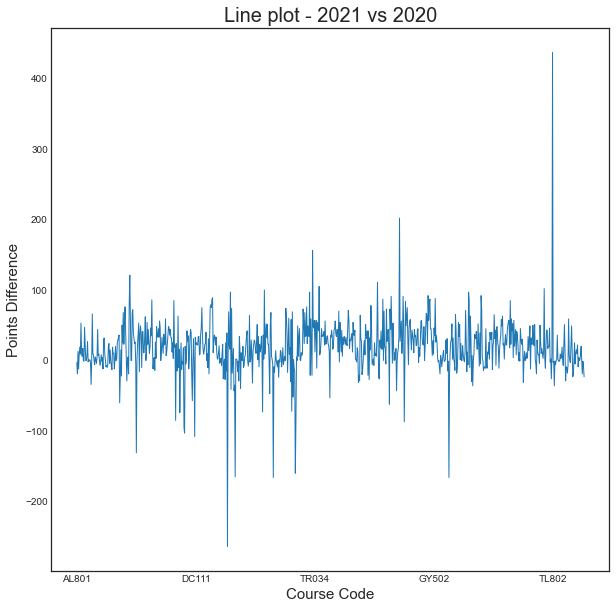

In [56]:
# Setting the size and style of the plot
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (10,10)
# Plotting the dataframe created when the values from 2020 were subtracted from 2021
Points_Diff.plot(linewidth=1)
# Formatting for improved appearance
plt.title ('Line plot - 2021 vs 2020', size=20)
plt.xlabel('Course Code', size=15)
plt.ylabel('Points Difference', size = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

A simple plot of the column created when the values from 2020 were subtracted from 2021 indicates the fluctuations that are seen between the two years. With such a large number of data points present, it is impossbile to see all course codes individually. However, the above plot gives a visual indication of the large variations seen from one year to another in the CAO points. A change (increase or decrease) of approximately 100 points seems to occur for a lot of courses. 

In [57]:
# Setting the columns as individual dataframes
R1_Points_2021 = allcourses['R1 Points_2021']
R1_Points_2020 = allcourses['R1 Points_2020']

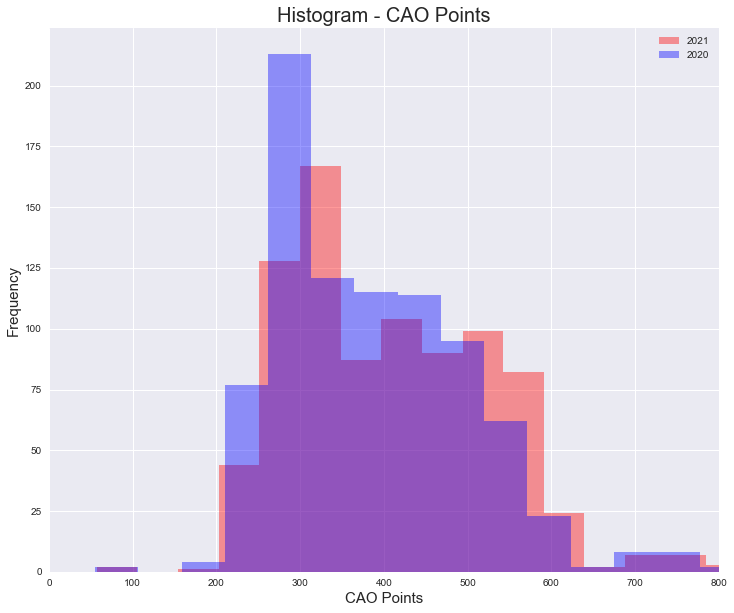

In [58]:
# Plotting
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,10)
plt.hist(R1_Points_2021, bins=20, alpha=0.4, color = 'red', label = '2021')
plt.hist(R1_Points_2020, bins=20, alpha=0.4, color = 'blue', label = '2020')
plt.xlabel('CAO Points', size=15)
plt.ylabel('Frequency', size = 15)
plt.xlim([0, 800])
plt.title ('Histogram - CAO Points', size=20)
plt.legend()
plt.show()

Overlaying histograms of the two years points in total also gives an indications of the points variation between years. In the year 2021 the course total that was most likely is approximately 320 points (Around 165 courses were offered in this range). This varied in 2020 where the most common course point value is below 300 (~ 290), with over 200 courses being near this value. This is a simple graphical illustration of the difference between the years.  
Another option for demonstrating the change in points of courses is to plot a kernel density estimator for each year. A kernel density estimate plot can estimate the probability density function of a random variable. This should yield an easily understood plot for comparing the two year CAO points.

(0.0, 800.0)

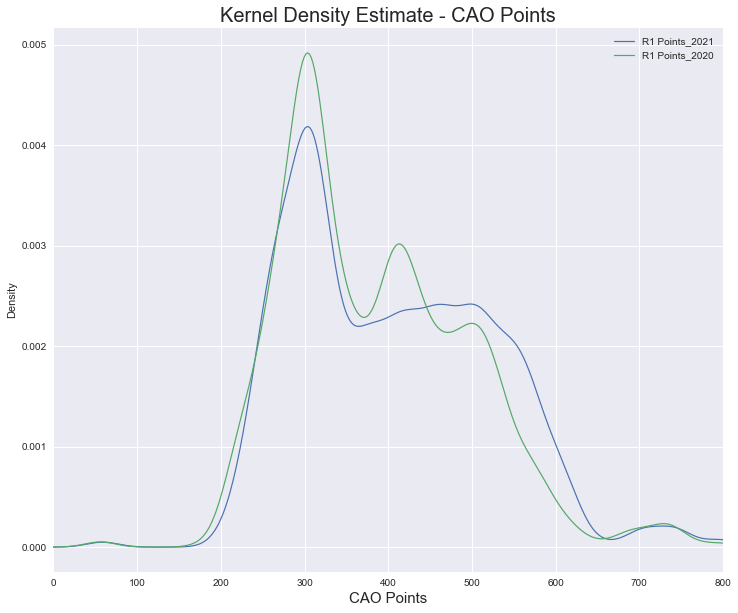

In [59]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,10)
allcourses.plot.kde(bw_method=0.15, linewidth = 1.2)
plt.xlabel('CAO Points', size=15)
plt.title ('Kernel Density Estimate - CAO Points', size=20)
plt.xlim([0, 800])

The kernel density estimate plot of the two years also gives a good visualisation of the two years' points. As seen in the previous histogram the most likely points value for all courses is the range of approximately 300. It was more apparent in the histogram that there was an increase from 2020 to 2021 in this range. However, a differerence in the range of 350 to 500 points has become more evident using the kde plot.  
In 2020 there is a maximum value of slightly higher than 400 points which is clear in the plot. For the year 2021 there was a greater spread of points in this range. This indicates that more courses increased towards the 500 points mark in 2021 when compared to 2020. The plot for 2021 does not drop down to near te baselinr again until the 650 point mark is reached, slightly after the plot for 2020 where the plot reaches the baseline just before the 650 mark.  
Both plots then increases slightly beyond the 700 point mark at the same rate, representing the few courses that are beyond this mark (likley to be medicine / dentistry / veterinary courses).  


![](https://www.irishexaminer.com/cms_media/module_img/5261/2630570_2_seoimage4x3_PA-17319182_1_.jpg)
This data is backed up by media reports of the CAO points offered. There was a large increase noted which "sent shockwaves throught the education system". There are a myriad of reasons suggested for the increase in points year on year (more on previous years increases will be offered below). An obvious root cause for this years increase is the introduction of a hybrid system in the leaving cert wher students were offered the choice of taking a predicitive grade from their teacher. This predicitive grade was offered to students as a result of missing a large amount of class time due to the COVID-19 pandemic, particularly in their first year of the two year leaving cert cycle.  
Another suspected reason for the increase seen in CAO points is the aspirations of students and their parents in modern society. Anecdotal evidence suggests that students are aiming for higher points than previous generations. Grinds are undertaken by a large cohort of students for the majority of subjects, whereas years ago grinds was more a niche option, which was the preserve of students of wealthy families. There is also an element of snobbery attached to certain educational routes (plc courses, apprenticeships, institutes of technology etc.) where only the most prestigious of universities are sought after and students / parents will do whatever it takes to reach these goals.  This puts enormous strain on teenagers to achieve better grades in school, thus driving up the CAO points for the majority of courses. 

## 2020 to 2019 Comparison

<br>
***

As we have EOS (End of Season) values from the 2020 dataframe and 2019 dataframe the best approach in terms of a comparative study, is to compare these two years using these EOS (End Of Season) values. There are no EOS values at the time of writing for the 2021 data available on the CAO website.

In [60]:
pd.set_option('display.max_rows', 10)
# Creating new dataframe with  just Course Code,Course, and Level from 2020
courses2020 = df2020[['Course Code', 'Course']]
courses2020

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1455,WD200,Arts (options)
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [61]:
# Also create new dataframe with  just Course Code and Course from 2019
# Only Level 8 present in original document
courses2019 = df2019[['Course Code', 'Course']]
courses2019

,Course Code,Course
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [62]:
# Concatenate the 2020 and 2019 dataframes
# Ignoring the index creates a new index for this dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
eos_courses = pd.concat([courses2020, courses2019], ignore_index=True)
eos_courses

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1952,WD200,Arts (options)
1953,WD210,Software Systems Development
1954,WD211,Creative Computing
1955,WD212,Recreation and Sport Management


In [63]:
# Sorting the values by the course code instead
eos_courses.sort_values('Course Code')

,Course Code,Course
0,AC120,International Business
1195,AC120,International Business
1,AC137,Liberal Arts
1196,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
...,...,...
1954,WD211,Creative Computing
1025,WD212,Recreation and Sport Management
1955,WD212,Recreation and Sport Management
1026,WD230,Mechanical and Manufacturing Engineering


In [64]:
# Spot check of duplicated rows, same title verified
eos_courses.loc[1025]['Course']

'Recreation and Sport Management'

In [65]:
eos_courses.loc[1955]['Course']

'Recreation and Sport Management'

In [66]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
eos_courses[eos_courses.duplicated()]

,Course Code,Course
1027,AL801,Software Design with Virtual Reality and Gaming
1029,AL803,Software Design with Mobile Apps and Connected...
1031,AL810,Quantity Surveying
1032,AL820,Mechanical and Polymer Engineering
1033,AL830,General Nursing
...,...,...
1952,WD200,Arts (options)
1953,WD210,Software Systems Development
1954,WD211,Creative Computing
1955,WD212,Recreation and Sport Management


In [67]:
# Set display rows to max to see all rows, reset to 10
pd.set_option('display.max_rows', 10)
# drop.duplicates removes the duplicated courses
eos_courses.drop_duplicates()

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1896,TL802,"TV, Radio and New Media"
1897,TL803,Music Technology
1900,TL812,Computing with Digital Media
1904,TL842,Construction Management


In [68]:
eos_courses = eos_courses[eos_courses.duplicated(subset=['Course Code'])]

In [69]:
eos_courses.drop_duplicates(subset=['Course Code'], inplace=True, ignore_index=True)
eos_courses

<ipython-input-69-b9f338d8aaed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eos_courses.drop_duplicates(subset=['Course Code'], inplace=True, ignore_index=True)


,Course Code,Course
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
786,WD200,Arts (options)
787,WD210,Software Systems Development
788,WD211,Creative Computing
789,WD212,Recreation and Sport Management


In [70]:
# The course code is now required to be the index of the dataframe
# Performed on original 2020 frame first for confirmation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
df2020.set_index('Course Code', inplace=True)
df2020

,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
Course Code,,,,,
AC120,International Business,209,209,280,8
AC137,Liberal Arts,252,252,270,8
AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#+matric,8
AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#+matric,8
AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#+matric,8
...,...,...,...,...,...
WD200,Arts (options),AQA,AQA,336,8
WD210,Software Systems Development,279,279,337,8
WD211,Creative Computing,271,271,318,8


In [71]:
eos_courses.set_index('Course Code', inplace=True)
eos_courses

,Course
Course Code,
AL801,Software Design with Virtual Reality and Gaming
AL802,Software Design with Cloud Computing
AL803,Software Design with Mobile Apps and Connected...
AL805,Network Management and Cloud Infrastructure
AL810,Quantity Surveying
...,...
WD200,Arts (options)
WD210,Software Systems Development
WD211,Creative Computing


In [72]:
eos_courses = eos_courses.join(df2020[['EOS_2020']])
eos_courses

,Course,EOS_2020
Course Code,,
AL801,Software Design with Virtual Reality and Gaming,303
AL802,Software Design with Cloud Computing,332
AL803,Software Design with Mobile Apps and Connected...,337
AL805,Network Management and Cloud Infrastructure,333
AL810,Quantity Surveying,326
...,...,...
WD200,Arts (options),AQA
WD210,Software Systems Development,279
WD211,Creative Computing,271


In [73]:
df2019_EOS = df2019[['Course Code', 'EOS_2019']]
df2019_EOS

,Course Code,EOS_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [74]:
# Setting the index as the course code as done previously
df2019_EOS.set_index('Course Code', inplace=True)
df2019_EOS

,EOS_2019
Course Code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [75]:
# Joining the 2019 EOS points to the 2020 EOS points
eos_courses = eos_courses.join(df2019_EOS)
eos_courses

,Course,EOS_2020,EOS_2019
Course Code,,,
AL801,Software Design with Virtual Reality and Gaming,303,304
AL802,Software Design with Cloud Computing,332,301
AL803,Software Design with Mobile Apps and Connected...,337,309
AL805,Network Management and Cloud Infrastructure,333,329
AL810,Quantity Surveying,326,307
...,...,...,...
WD200,Arts (options),AQA,221
WD210,Software Systems Development,279,271
WD211,Creative Computing,271,275


## References
***
<br>
[1] https://www.irishexaminer.com/lifestyle/healthandwellbeing/arid-40697222.html  
[2] 


***
## End